## Import the necessary libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset from https://www.kaggle.com/datasets/pradeepjangirml007/laptop-data-set?resource=download

In [ ]:
import kagglehub
import os

# Download latest version - https://www.kaggle.com/datasets/pradeepjangirml007/laptop-data-set?resource=download
path = kagglehub.dataset_download("pradeepjangirml007/laptop-data-set")

# Find the CSV file within the downloaded directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    # Assuming there's only one CSV file, use the first one found
    csv_file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(csv_file_path)
else:
    print("No CSV files found in the downloaded dataset.")

100%|██████████| 162k/162k [00:00<00:00, 26.2MB/s]

Extracting files...


In [ ]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

# Data Preparation

In [ ]:
# Drop unnecessary index column if exists
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
# Shape and column names
def shape(df):
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumns:\n", df.columns.tolist())

shape(df)

Number of rows: 3976
Number of columns: 17

Columns:
 ['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life']


## Cast to correct data types

In [ ]:

df['Brand'] = df['Brand'].astype('category')
df['Name'] = df['Name'].astype('category')
df['Processor_Name'] = df['Processor_Name'].astype('category')
df['Processor_Brand'] = df['Processor_Brand'].astype('category')
df['RAM_Expandable'] = df['RAM_Expandable'].astype('category')
df['RAM_TYPE'] = df['RAM_TYPE'].astype('category')
df['Display_type'] = df['Display_type'].astype('category')
df['GPU'] = df['GPU'].astype('category')
df['GPU_Brand'] = df['GPU_Brand'].astype('category')


In [ ]:
# Clean RAM column → extract only numbers
df["RAM"] = df["RAM"].astype(str).str.extract(r'(\d+)').astype(int)

# Convert to string
df["Ghz"] = df["Ghz"].astype(str)
# Extract only numeric part (e.g. 1.8, 2.5, 4.5)
df["Ghz"] = df["Ghz"].str.extract(r'(\d+\.?\d*)', expand=False)
# Convert to float safely (non-numeric → NaN → fill with 0)
df["Ghz"] = pd.to_numeric(df["Ghz"], errors="coerce").fillna(0)

# Convert to string (safe)
df['Display'] = df['Display'].astype(str)
# Extract numeric part only (inch size)
df['Display'] = df['Display'].str.extract(r'(\d+\.?\d*)')[0]
# Convert to float
df['Display'] = pd.to_numeric(df['Display'], errors='coerce').fillna(0)


# Convert everything to string
df["SSD"] = df["SSD"].astype(str)
# Replace variations
df["SSD"] = df["SSD"].replace("nan", "0 GB SSD")  # handle nan as text
df["SSD"] = df["SSD"].replace("NO SSD", "0 GB SSD")
# Extract only numbers
df["SSD"] = df["SSD"].str.extract(r'(\d+)').fillna(0).astype(int)

# Convert everything to string
df["HDD"] = df["HDD"].astype(str)
# Replace variations
df["HDD"] = df["HDD"].replace("nan", "0 GB HDD Storage")   # NaN as text
df["HDD"] = df["HDD"].replace("No HDD", "0 GB HDD Storage")
# Extract only numeric values
df["HDD"] = df["HDD"].str.extract(r'(\d+)').fillna(0).astype(int)


# Replace 'no' with 0
df["Adapter"] = df["Adapter"].replace("no", "0")
# Convert to int
df["Adapter"] = df["Adapter"].astype(int)


# Fill NaN with "0"
df["Battery_Life"] = df["Battery_Life"].fillna("0")
# Keep only rows with "Hrs" keyword, else convert to "0 Hrs Battery Life"
df["Battery_Life"] = df["Battery_Life"].apply(
    lambda x: str(x) if "hr" in str(x).lower() else "0 Hrs Battery Life"
)
# Extract numeric values (hours)
df["Battery_Hours"] = df["Battery_Life"].str.extract(r'(\d+\.?\d*)', expand=False)
df["Battery_Hours"] = pd.to_numeric(df["Battery_Hours"], errors='coerce').fillna(0)
# Optional: Keep "Hrs" text column
df["Battery_Life"] = df["Battery_Hours"].astype(str) + " Hrs"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Brand            3976 non-null   category
 1   Name             3976 non-null   category
 2   Price            3976 non-null   int64   
 3   Processor_Name   3976 non-null   category
 4   Processor_Brand  3976 non-null   category
 5   RAM_Expandable   3976 non-null   category
 6   RAM              3976 non-null   int64   
 7   RAM_TYPE         3976 non-null   category
 8   Ghz              3976 non-null   float64 
 9   Display_type     3976 non-null   category
 10  Display          3976 non-null   float64 
 11  GPU              3968 non-null   category
 12  GPU_Brand        3972 non-null   category
 13  SSD              3976 non-null   int64   
 14  HDD              3976 non-null   int64   
 15  Adapter          3976 non-null   int64   
 16  Battery_Life     3976 non-null   object  


In [ ]:
#Missing values count
def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing>0]
    missing.sort_values(ascending=False)
    return missing

missing_values(df)


,0
GPU,8
GPU_Brand,4


## Remove rows with missing values

In [ ]:
df = df.dropna()
missing_values(df)

,0


## Remove duplicate rows

In [ ]:
# Remove all duplicate rows, keeping the first occurrence (default behavior)
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
df = df.drop_duplicates()
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 4

Number of duplicate rows: 0


In [ ]:
shape(df)

Number of rows: 3960
Number of columns: 18

Columns:
 ['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life', 'Battery_Hours']


## Remove outliers

In [ ]:
def remove_outliers_iqr(df, columns=None):
    df_cleaned = df.copy()
    if columns is None:
        columns = df_cleaned.select_dtypes(include=np.number).columns

    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

# Remove outliers based on the 'Price' column first
df = remove_outliers_iqr(df, columns=['Price'])

# Then remove outliers from all numerical columns in the resulting dataframe
df = remove_outliers_iqr(df)

shape(df)

Number of rows: 2224
Number of columns: 18

Columns:
 ['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life', 'Battery_Hours']


## Correlation Analysis

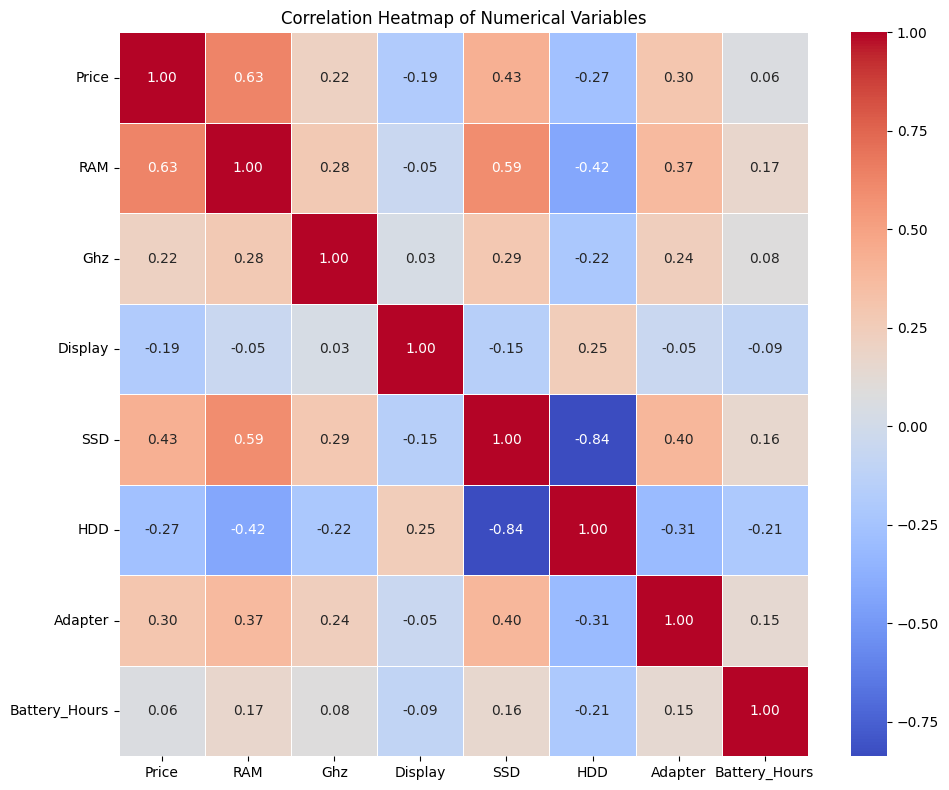

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

## Visualization of the relationship between each pair of variables

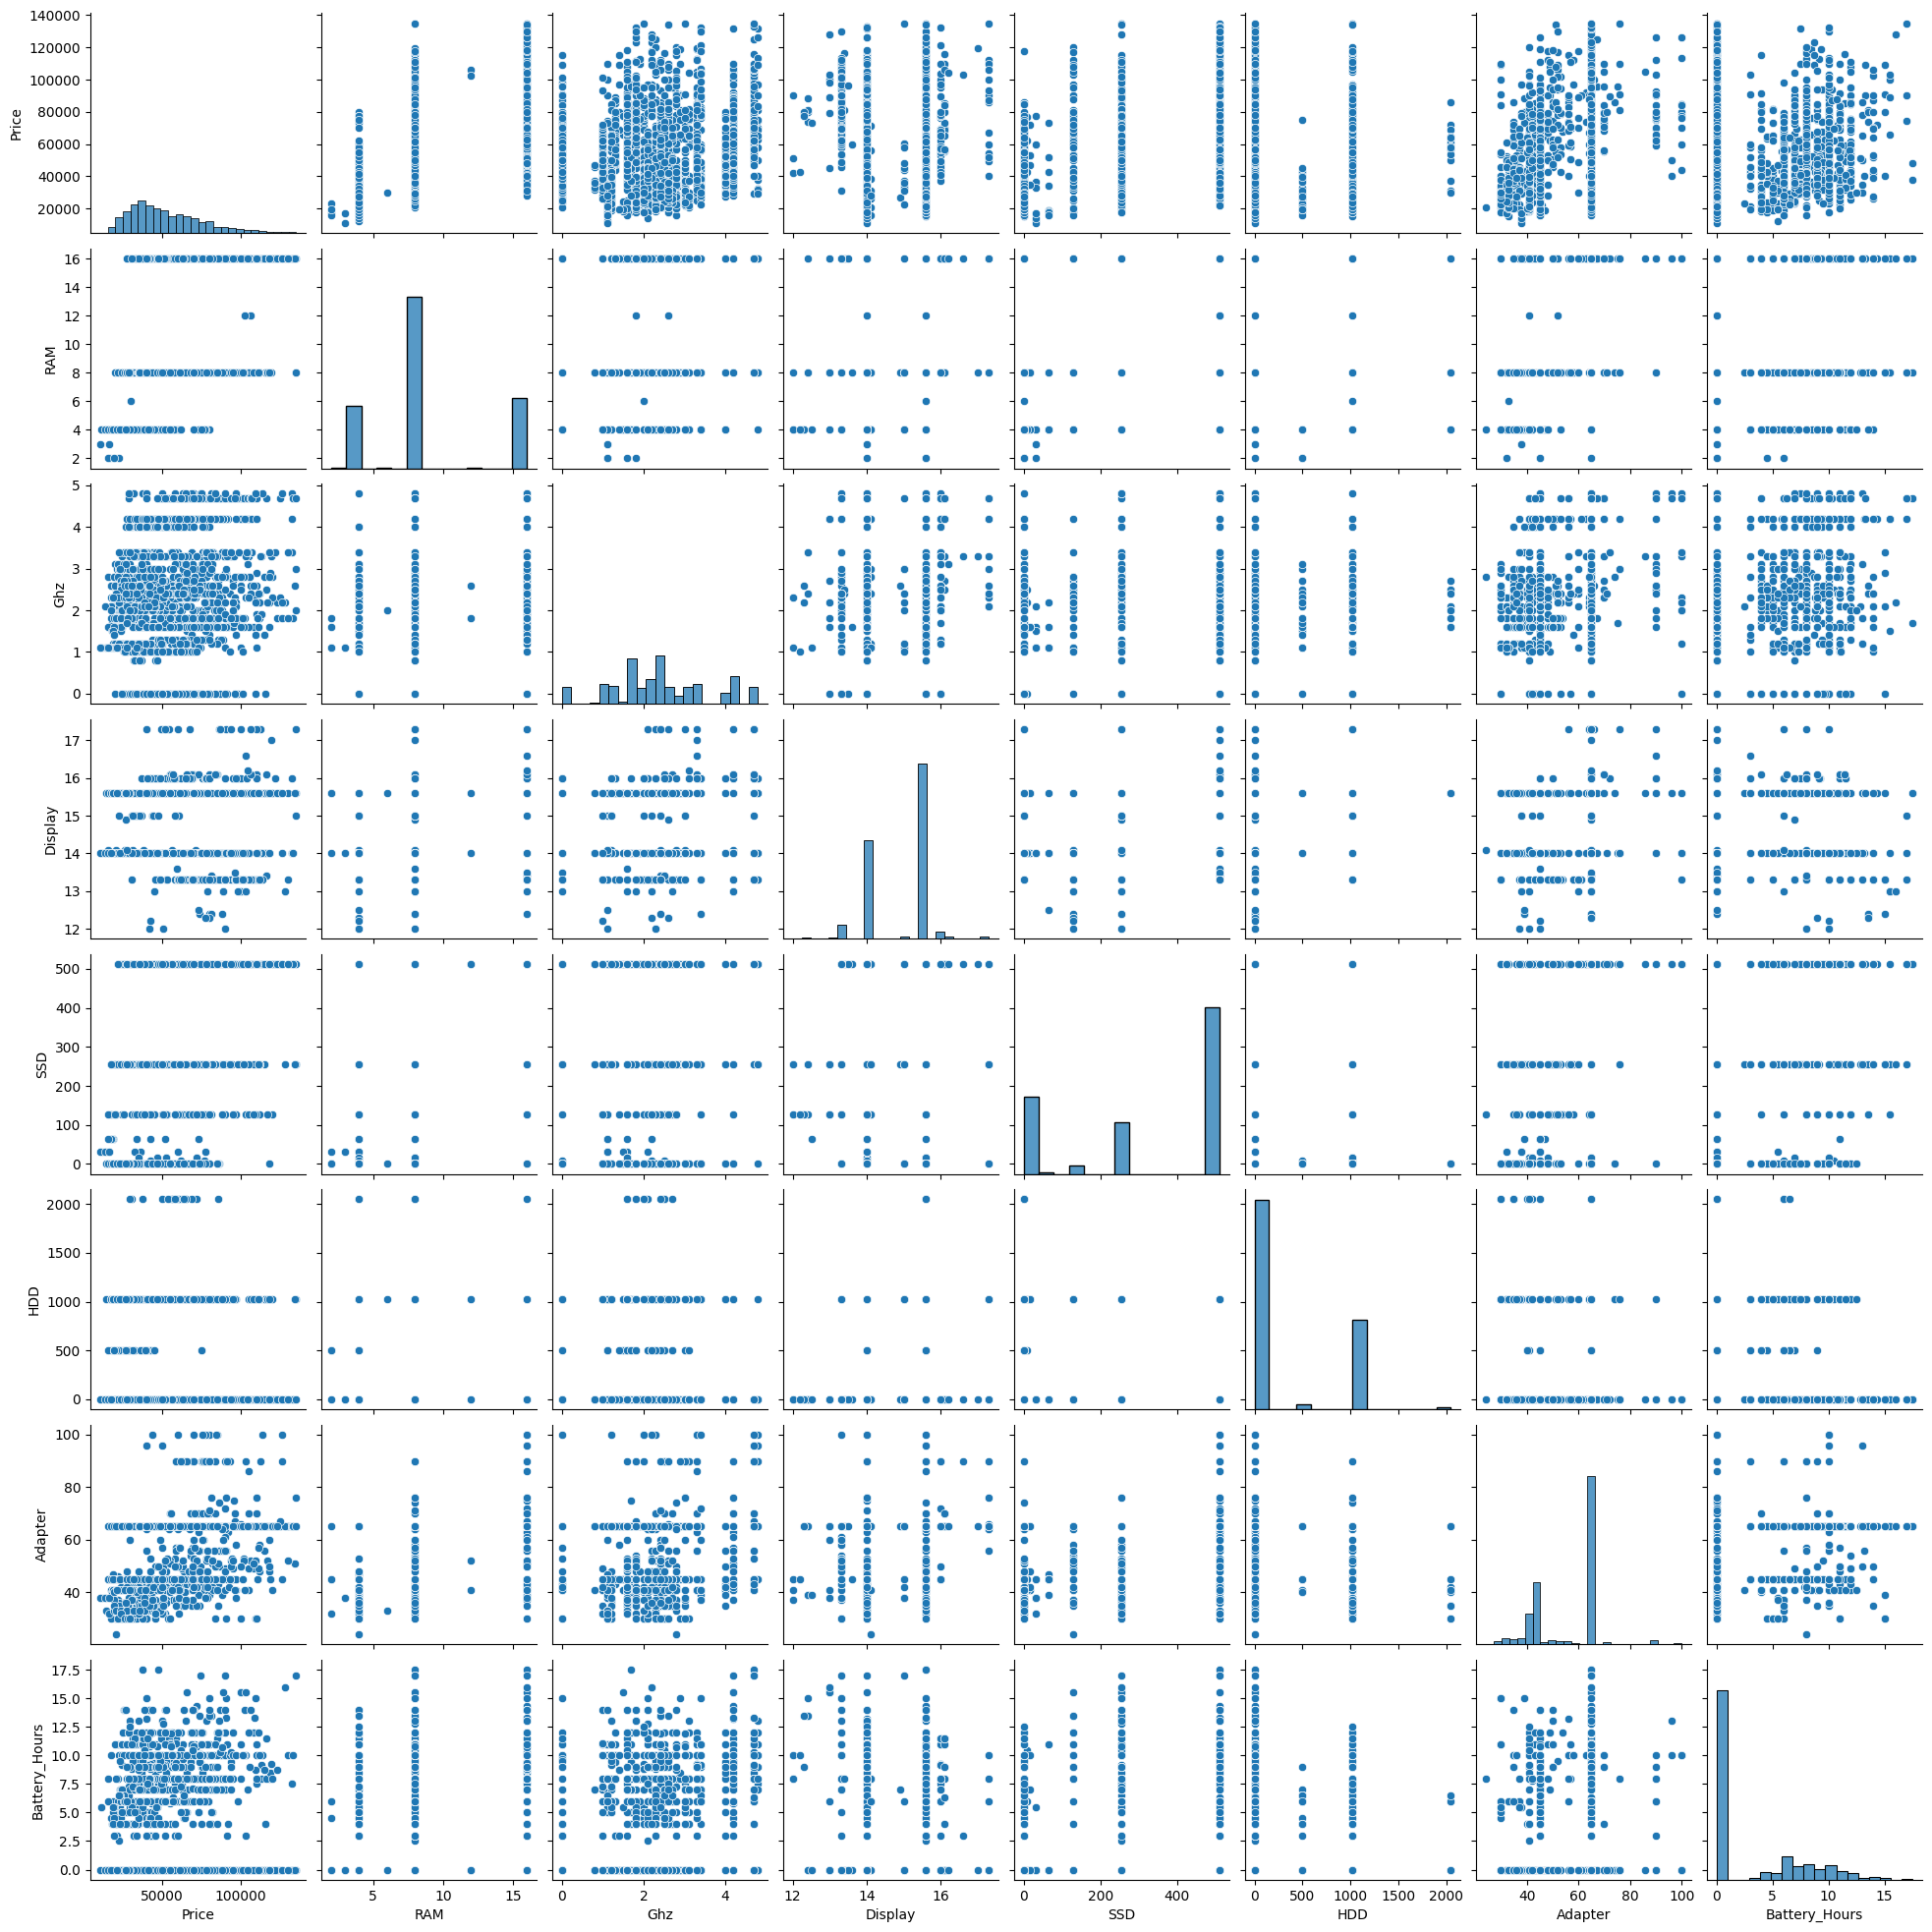

In [ ]:
# Create pairplot
sns.pairplot(numerical_df)
plt.show()

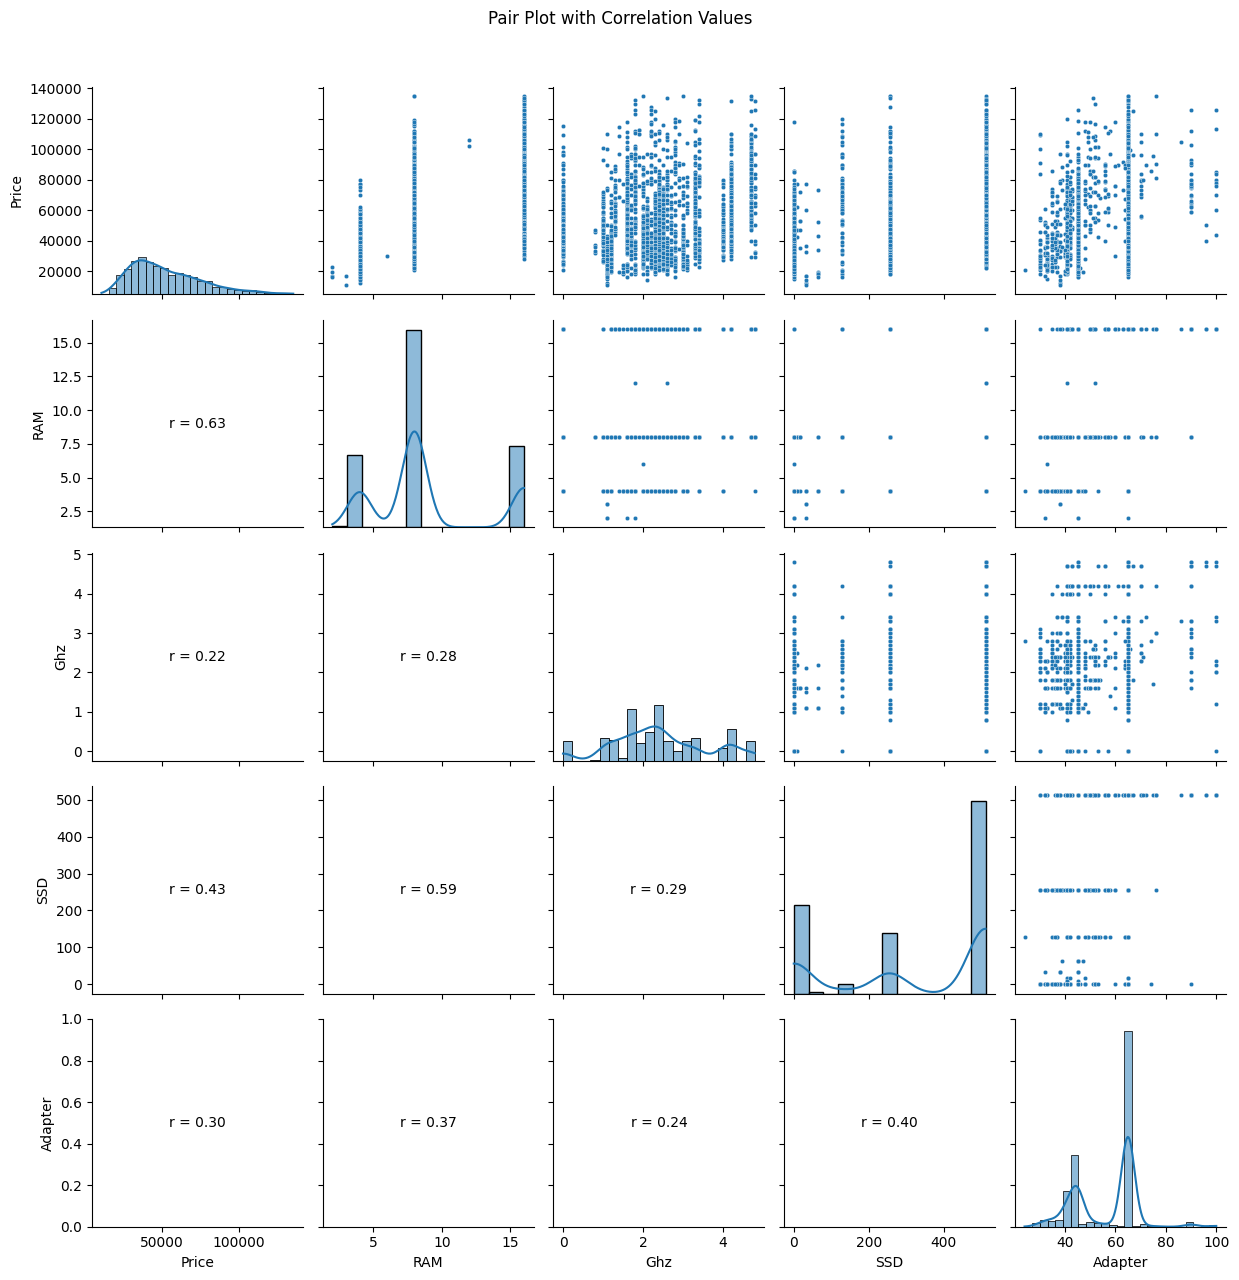

In [ ]:
# Select numerical columns (excluding 'mental_health_rating')
numerical_df = df.select_dtypes(include=['number']).drop(columns=['Display','HDD','Battery_Hours'])

# Create a custom function to display correlation values
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(.5, .5), xycoords=ax.transAxes, ha='center', va='center', fontsize=10)

# Create a PairGrid
g = sns.PairGrid(numerical_df)

# Upper triangle: scatterplots
g.map_upper(sns.scatterplot, s=10)

# Lower triangle: correlation values
g.map_lower(corrfunc)

# Diagonal: histograms
g.map_diag(sns.histplot, kde=True)

plt.suptitle("Pair Plot with Correlation Values", y=1.02)
plt.tight_layout()
plt.show()

## Distributions of numeric data values, with categorical variables

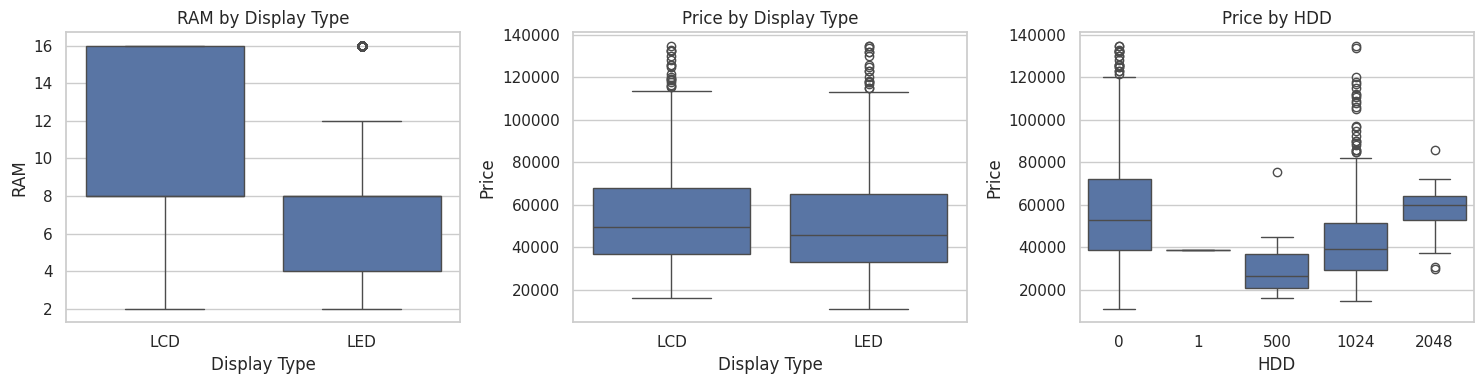

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot 1: Price vs Display type
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Display_type', y='RAM', data=df)
plt.title('RAM by Display Type')
plt.xlabel('Display Type')
plt.ylabel('RAM')

# Plot 2: Price vs Display_type
plt.subplot(1, 3, 2)
sns.boxplot(x='Display_type', y='Price', data=df)
plt.title('Price by Display Type')
plt.xlabel('Display Type')
plt.ylabel('Price')

# Plot 3: Price vs HDD
plt.subplot(1, 3, 3)
sns.boxplot(x='HDD', y='Price', data=df)
plt.title('Price by HDD')
plt.xlabel('HDD')
plt.ylabel('Price')


plt.tight_layout()
plt.show()

## Evaluate the relationship between two categorical variables

In [ ]:
from scipy.stats import chi2_contingency

# Define the pairs of categorical variables
cat_pairs = [
    ('Brand', 'Processor_Name'),
    ('RAM_TYPE', 'GPU'),
    ('Processor_Name', 'GPU_Brand')
]

# Perform Chi-Square tests
for var1, var2 in cat_pairs:
    table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(table)

    print(f"Chi-Square Test between '{var1}' and '{var2}':")
    print(f"Chi² = {chi2:.2f}, p-value = {p:.4f}, dof = {dof}")
    if p < 0.05:
        print("→ Significant association (p < 0.05)\n")
    else:
        print("→ No significant association (p ≥ 0.05)\n")

Chi-Square Test between 'Brand' and 'Processor_Name':
Chi² = 4217.72, p-value = 0.0000, dof = 2090
→ Significant association (p < 0.05)

Chi-Square Test between 'RAM_TYPE' and 'GPU':
Chi² = 8705.71, p-value = 0.0000, dof = 3078
→ Significant association (p < 0.05)

Chi-Square Test between 'Processor_Name' and 'GPU_Brand':
Chi² = 11573.62, p-value = 0.0000, dof = 760
→ Significant association (p < 0.05)



## Run the Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --- Define variables ---
categorical = ['Brand', 'Name', 'Processor_Name', 'Processor_Brand',
               'RAM_Expandable', 'RAM_TYPE', 'Display_type', 'GPU', 'GPU_Brand']
numerical = ['RAM', 'Ghz', 'SSD', 'Adapter']

# --- Handle rare categories (merge small groups into "Other") ---
for col in categorical:
    counts = df[col].value_counts()
    rare = counts[counts < 10].index  # threshold = 10
    df[col] = df[col].replace(rare, 'Other')
    df[col] = df[col].astype('category')


X = df[categorical + numerical]
y = df['Price']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Preprocessor with OneHotEncoder ---
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical)
], remainder='passthrough')

# --- Candidate models ---
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)
}

# --- Train and evaluate each model ---
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n{name} Evaluation:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

/tmp/ipython-input-2197744503.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare, 'Other')
/tmp/ipython-input-2197744503.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(rare, 'Other')
/tmp/ipython-input-2197744503.py:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replac


Linear Regression Evaluation:
R² Score: 0.7195218595032198
MAE: 9081.855399473221
RMSE: 12335.454830510507

Decision Tree Evaluation:
R² Score: 0.5223719917674542
MAE: 11571.550449438202
RMSE: 16097.20780650284

Random Forest Evaluation:
R² Score: 0.6874058720571421
MAE: 9135.96974389035
RMSE: 13022.55095367694

XGBoost Evaluation:
R² Score: 0.7364742755889893
MAE: 8253.9921875
RMSE: 11956.86112656662


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# --- Define variables ---
categorical = ['Brand', 'Name', 'Processor_Name', 'Processor_Brand',
               'RAM_Expandable', 'RAM_TYPE', 'Display_type', 'GPU', 'GPU_Brand']
numerical = ['RAM', 'Ghz', 'SSD', 'Adapter']

# --- Handle rare categories (merge small groups into "Other") ---
# Apply rare category handling BEFORE train-test split
for col in categorical:
    counts = df[col].value_counts()
    rare = counts[counts < 10].index  # threshold = 10
    df[col] = df[col].replace(rare, 'Other')
    df[col] = df[col].astype('category')


X = df[categorical + numerical]
y = df['Price']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Preprocessor with OneHotEncoder ---
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical)
], remainder='passthrough')

# --- Create pipeline ---
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# --- Fit the model ---
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Brand', 'Name',
                                                   'Processor_Name',
                                                   'Processor_Brand',
                                                   'RAM_Expandable', 'RAM_TYPE',
                                                   'Display_type', 'GPU',
                                                   'GPU_Brand'])])),
                ('model', LinearRegression())])

In [ ]:
for col in categorical:
    print(f"{col}: {df[col].cat.categories}")

Brand: Index(['ASUS', 'Other', 'Acer', 'Apple', 'Dell', 'HP', 'Honor', 'Infinix',
       'Lenovo', 'MSI', 'Microsoft', 'Samsung', 'Xiaomi'],
      dtype='object')
Name: Index(['Other'], dtype='object')
Processor_Name: Index(['Other', 'AMD Dual-Core A6 APU', 'AMD Dual-Core A9 APU',
       'AMD Dual-Core Athlon', 'AMD Dual-Core Ryzen 3',
       'AMD Hexa-Core Ryzen 5', 'AMD Hexa-Core Ryzen 5 Processor',
       'AMD Octa-Core Ryzen 7', 'AMD Quad-Core Ryzen 3',
       'AMD Quad-Core Ryzen 5', 'Intel Celeron Dual-Core',
       'Intel Core i3 (10th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i3 (11th Gen) Processor', 'Intel Core i3 (12th Gen)',
       'Intel Core i3 (13th Gen)', 'Intel Core i3 (6th Gen)',
       'Intel Core i3 (7th Gen)', 'Intel Core i3 (8th Gen)',
       'Intel Core i5 (10th Gen)', 'Intel Core i5 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (12th Gen)',
       'Intel Core i5 (13th Gen)', 'Intel Core i5 (7th Gen)',
       'Intel Core i5 

In [ ]:
# Get OneHotEncoder step inside ColumnTransformer
ohe = pipeline.named_steps['preprocessing'].named_transformers_['cat']

# Get feature names generated by OneHotEncoder
encoded_feature_names = ohe.get_feature_names_out(categorical).tolist()

# Final full list of features (encoded categorical + numerical)
full_feature_names = encoded_feature_names + numerical

# Significance of Coefficients

In [ ]:
coefficients = pipeline.named_steps['model'].coef_
intercept = pipeline.named_steps['model'].intercept_

# Create the coefficient table
coef_table = pd.DataFrame({
    'Feature': full_feature_names,
    'Coefficient': coefficients
})

print("Intercept:", intercept)
display(coef_table)

Intercept: 13302.560511375828


,Feature,Coefficient
0,Brand_Acer,-4883.976526
1,Brand_Apple,37206.182149
2,Brand_Dell,3969.582457
3,Brand_HP,3757.179133
4,Brand_Honor,-9112.369057
...,...,...
96,GPU_Brand_Other,-1293.760636
97,RAM,1431.436485
98,Ghz,236.408785
99,SSD,18.716880


In [ ]:
# Predict on test data
y_pred = pipeline.predict(X_test)
residuals = y_test - y_pred

## Comparison of Actual vs Predicted Price Scores

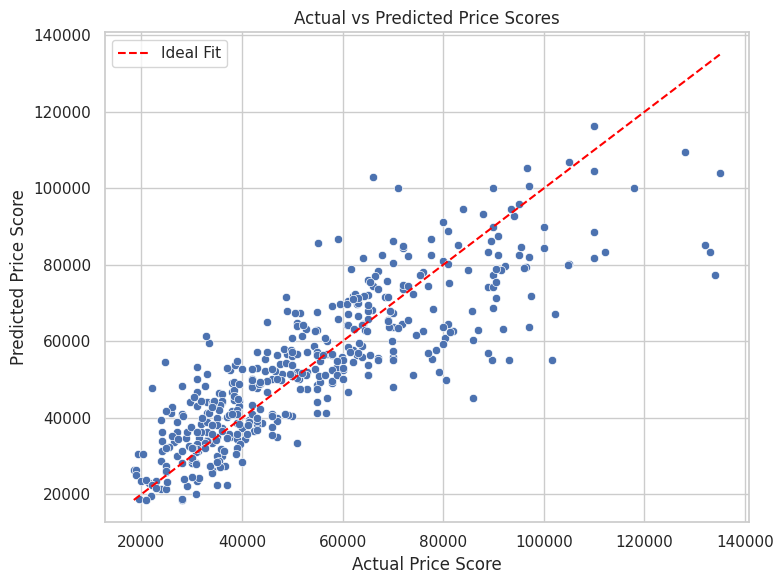

In [ ]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Price Score')
plt.ylabel('Predicted Price Score')
plt.title('Actual vs Predicted Price Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of predictors

adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Adjusted R-squared (R²): {adj_r2:.3f}")                            # Alt + 0178

Mean Absolute Error (MAE): 9081.855
Mean Squared Error (MSE): 152163445.876
Root Mean Squared Error (RMSE): 12335.455
R-squared (R²): 0.720
Adjusted R-squared (R²): 0.711


# Residual Analysis

## Independence of Errors

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin–Watson Statistic: {dw_stat:.4f}")

Durbin–Watson Statistic: 1.8332


## Normality of Errors

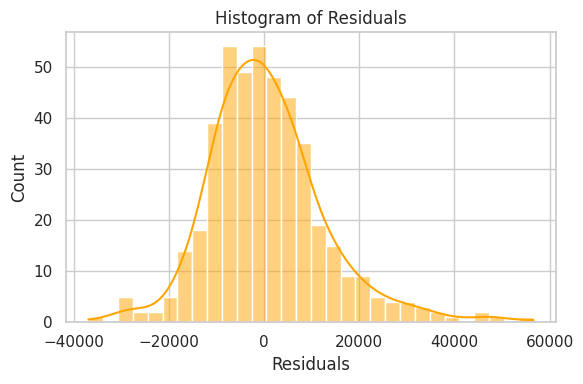

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

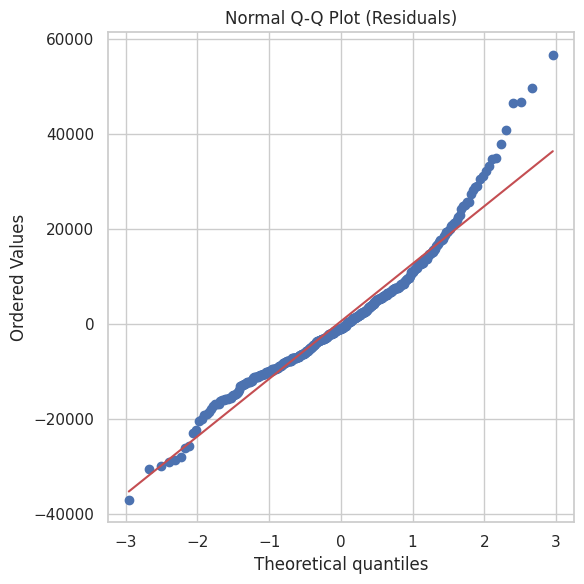

In [ ]:
from scipy.stats import probplot

plt.figure(figsize=(6, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot (Residuals)')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_test.pvalue:.4f}")

Shapiro-Wilk p-value: 0.0000


## Constant Variance (Homoscedasticity)

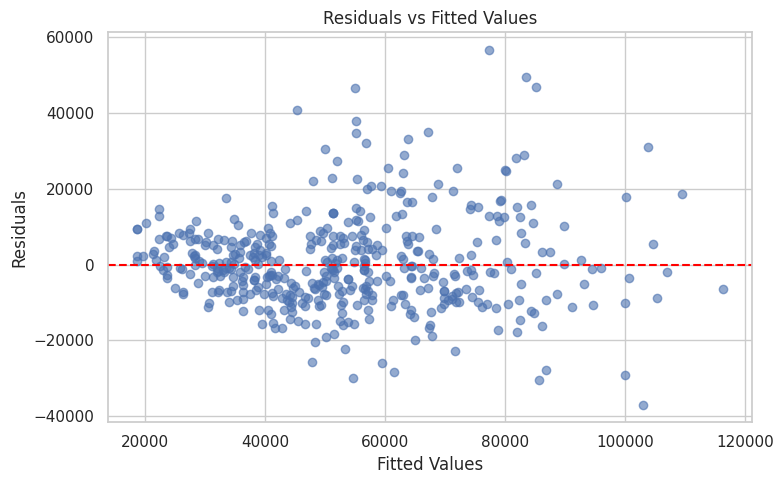

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

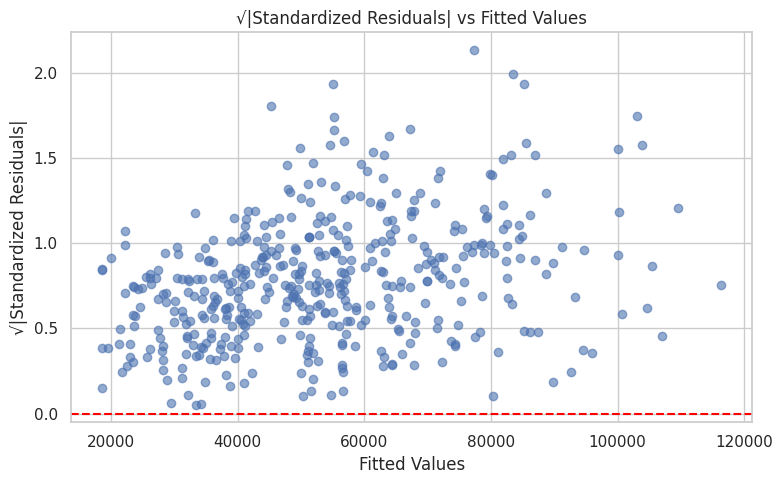

In [ ]:
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
sqrt_std_resid = np.sqrt(np.abs(standardized_residuals))

# Fitted values
fitted_vals = y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, sqrt_std_resid, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("√|Standardized Residuals|")                         # Alt + 251
plt.title("√|Standardized Residuals| vs Fitted Values")
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch–Pagan Test
X_test_transformed = preprocessor.transform(X_test)

# Convert sparse matrix to dense array before adding constant
X_test_transformed_dense = X_test_transformed.toarray()

X_sm = sm.add_constant(X_test_transformed_dense)
bp_test = het_breuschpagan(residuals, X_sm)
print(f"Breusch–Pagan Test p-value: {bp_test[1]:.4f}")

Breusch–Pagan Test p-value: 0.0008


## Detect and quantify multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Combine all training features for VIF calculation
X_vif = pd.DataFrame(preprocessor.fit_transform(X_train).toarray(), columns=full_feature_names)

print("\nVariance Inflation Factor (VIF):")
for i in range(X_vif.shape[1]):
    vif = variance_inflation_factor(X_vif.values, i)
    print(f"{X_vif.columns[i]}: {vif:.2f}")


Variance Inflation Factor (VIF):
Brand_Acer: 1.55
Brand_Apple: 1.48
Brand_Dell: 1.80
Brand_HP: 2.42
Brand_Honor: 1.24
Brand_Infinix: 1.48
Brand_Lenovo: 2.09
Brand_MSI: 1.52
Brand_Microsoft: 1.16
Brand_Other: 1.28
Brand_Samsung: 1.45
Brand_Xiaomi: 1.07
Processor_Name_AMD Dual-Core A9 APU: 2.30
Processor_Name_AMD Dual-Core Athlon: 4.50
Processor_Name_AMD Dual-Core Ryzen 3: 8.11
Processor_Name_AMD Hexa-Core Ryzen 5: 17.99
Processor_Name_AMD Hexa-Core Ryzen 5 Processor: 2.61
Processor_Name_AMD Octa-Core Ryzen 7: 11.29
Processor_Name_AMD Quad-Core Ryzen 3: 5.05
Processor_Name_AMD Quad-Core Ryzen 5: 12.21
Processor_Name_Intel Celeron Dual-Core: 10.61
Processor_Name_Intel Core i3 (10th Gen): 16.37
Processor_Name_Intel Core i3 (11th Gen): 23.22
Processor_Name_Intel Core i3 (11th Gen) Processor: 4.00
Processor_Name_Intel Core i3 (12th Gen): 9.52
Processor_Name_Intel Core i3 (13th Gen): 4.00
Processor_Name_Intel Core i3 (6th Gen): 10.51
Processor_Name_Intel Core i3 (7th Gen): 12.90
Processor_Na

In [ ]:
unique_counts_all_columns = df.nunique()
print("Unique counts per column:\n", unique_counts_all_columns)
print(shape(df))

Unique counts per column:
 Brand                13
Name                  1
Price              1108
Processor_Name       33
Processor_Brand       3
RAM_Expandable        7
RAM                   7
RAM_TYPE             15
Ghz                  30
Display_type          2
Display              21
GPU                  28
GPU_Brand             4
SSD                   8
HDD                   5
Adapter              43
Battery_Life         60
Battery_Hours        60
dtype: int64
Number of rows: 2224
Number of columns: 18

Columns:
 ['Brand', 'Name', 'Price', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter', 'Battery_Life', 'Battery_Hours']
None


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# --- Define categorical and numerical variables ---
categorical = ['Brand', 'Name', 'Processor_Name', 'Processor_Brand',
               'RAM_Expandable', 'RAM_TYPE', 'Display_type', 'GPU', 'GPU_Brand']
numerical = ['RAM', 'Ghz', 'SSD', 'Adapter']

# --- Handle rare categories (merge small groups into "Other") ---
for col in categorical:
    counts = df[col].value_counts()
    rare = counts[counts < 10].index  # threshold = 10
    df[col] = df[col].replace(rare, 'Other')
    df[col] = df[col].astype('category')

# --- Train/test split ---
X = df[categorical + numerical]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Combine into one DataFrame for statsmodels ---
train_data = X_train.copy()
train_data['Price'] = y_train

# --- Build regression formula dynamically ---
formula = "Price ~ " + " + ".join([f"C({col})" for col in categorical] + numerical)

# --- Fit OLS model ---
model = smf.ols(formula=formula, data=train_data).fit()

# --- Print summary ---
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     49.17
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:25:11   Log-Likelihood:                -19176.
No. Observations:                1779   AIC:                         3.856e+04
Df Residuals:                    1677   BIC:                         3.912e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
# Prepare test data
test_data = X_test.copy()
test_data['Price'] = y_test

# Predict using the trained model
test_data['fitted'] = model.predict(test_data)

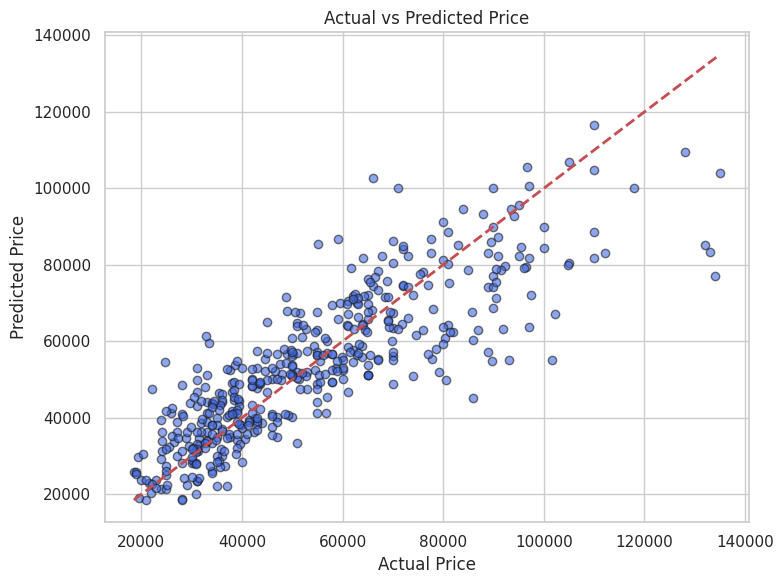

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Price'], test_data['fitted'], alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([test_data['Price'].min(), test_data['Price'].max()],
         [test_data['Price'].min(), test_data['Price'].max()],
         'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Combine test data for prediction
test_data = X_test.copy()
test_data['Price'] = y_test

# Predict using the trained model
y_pred = model.predict(X_test)

# Residuals = Actual - Predicted
residuals = y_test - y_pred

In [ ]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_test.pvalue:.4f}")


Shapiro-Wilk p-value: 0.0000


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# One-hot encode X_test (to convert categories to numeric)
exog = pd.get_dummies(X_test, drop_first=True)

# Add constant
exog = sm.add_constant(exog)

# Run Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, exog)
print("\n--- Breusch-Pagan Test ---")
print(f"Test Statistic: {bp_test[0]:.4f}")
print(f"p-value       : {bp_test[1]:.4f}")


--- Breusch-Pagan Test ---
Test Statistic: 152.1816
p-value       : 0.0008


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Generate design matrices (X with dummies and y)
y, X_design = dmatrices(formula, data=train_data, return_type='dataframe')

# Drop intercept column
X_design_no_intercept = X_design.loc[:, X_design.columns != 'Intercept']

# Compute VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = X_design_no_intercept.columns
vif_df["VIF"] = [variance_inflation_factor(X_design_no_intercept.values, i) for i in range(X_design_no_intercept.shape[1])]

print(vif_df)

                    Feature        VIF
0         C(Brand)[T.Other]   1.256913
1          C(Brand)[T.Acer]   1.541549
2         C(Brand)[T.Apple]   1.471263
3          C(Brand)[T.Dell]   1.796287
4            C(Brand)[T.HP]   2.399067
..                      ...        ...
96   C(GPU_Brand)[T.NVIDIA]   9.819890
97                      RAM  15.195028
98                      Ghz  11.721600
99                      SSD  10.078184
100                 Adapter  32.068138

[101 rows x 2 columns]
